In [1]:
import numpy as np
import pandas
from astropy.cosmology import Planck15 as cosmo
import pickle
import astropy.units as u
import matplotlib.pyplot as plt

In [2]:
cat = pickle.load(open('/Users/mbethermin/SIDES/PYSIDES/OUTPUTS/pySIDES_from_original.p', 'rb'))

In [3]:
field_area = 2. * (np.pi / 180.)**2 #sr

In [4]:
zbins = np.arange(0,10.1,0.1)
zmean = 0.5*(zbins[0:-1]+zbins[1:])

In [5]:
Dc_bins = cosmo.comoving_distance(zbins)

In [6]:
SFRD = np.zeros_like(zmean)

In [7]:
for k in range(0, len(zmean)):
    Vslice = field_area / 3 * (Dc_bins[k+1]**3-Dc_bins[k]**3)
    SFRtot = np.sum(cat.loc[ (cat['redshift'] > zbins[k]) & (cat['redshift'] < zbins[k+1])]['SFR'])
    SFRD[k] = SFRtot / Vslice.value

-1.1955167833680918 [ 1.32063242e-02 -3.44720436e-01  3.21803207e+00 -1.31490389e+01
  1.85934145e+01]
         4          3         2
0.01321 x - 0.3447 x + 3.218 x - 13.15 x + 19.79
19.788931271994528


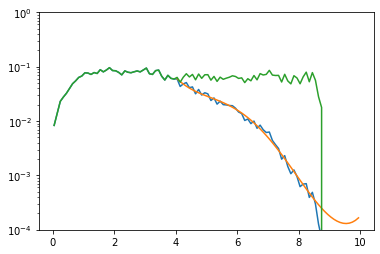

In [8]:
plt.plot(zmean, SFRD)

sel = np.where( (zmean>4) & (zmean < 8.5) )

pcoeff = np.polyfit(zmean[sel], np.log10(SFRD[sel]), 4)
    
p = np.poly1d(pcoeff)
SFRDmod = 10.**p(zmean)
    
sel = np.where(zmean>4)
plt.plot(zmean[sel], SFRDmod[sel])

corr_factor = 0.*zmean + 1.
sel = np.where(zmean>4)
corr_factor[sel] = 10.**(p(4) - p(zmean[sel]))

ptest = np.poly1d([ 1.32063242e-02, -3.44720436e-01,  3.21803207e+00, -1.31490389e+01, 1.85934145e+01 - p(4)])
corr_test = 0.*zmean + 1.
corr_test[sel] = 10.**(-ptest(zmean[sel]))


plt.plot(zmean, SFRD * corr_factor)

plt.yscale('log')

plt.ylim([1.e-4,1.])

print(p(4), pcoeff)
print(ptest)
print(pcoeff[4]-p(4))

#TO USE TO CORRECT IN OTHER CODES:
#pcorr = np.poly1d([ 1.32063242e-02, -3.44720436e-01,  3.21803207e+00, -1.31490389e+01, 19.788931271994528])

In [9]:
pcorr = np.poly1d([ 1.32063242e-02, -3.44720436e-01,  3.21803207e+00, -1.31490389e+01,19.788931271994528])
pcorr(4)

-1.1680548084314069e-07

In [10]:
corr_factor / corr_test

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999975, 0.99999975, 0.99999974, 0.99999974, 0.99999973,
       0.99999972, 0.99999972, 0.99999971, 0.99999971, 0.9999997 ,
       0.99999969, 0.99999969, 0.99999968, 0.99999967, 0.99999967,
       0.99999966, 0.99999966, 0.99999965, 0.99999964, 0.99999964,
       0.99999963, 0.99999962, 0.99999962, 0.99999961, 0.9999996 ,
       0.9999996 , 0.99999959, 0.99999958, 0.99999957, 0.99999957,
       0.99999956, 0.99999955, 0.99999954, 0.99999953, 0.99999

In [11]:
Madau_UVcorr = np.loadtxt('SFRD_UVcorr_Madau13.txt')
Madau_IR = np.loadtxt('SFRD_IR_Madau13.txt')

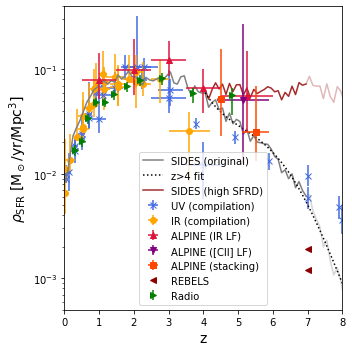

In [21]:
plt.figure(figsize = (5,5))

safez = np.where(zmean <= 7)
unsafez = np.where(zmean >= 7)

plt.plot(zmean[safez], SFRD[safez], color = 'grey', label = 'SIDES (original)', zorder = 3)
plt.plot(zmean[unsafez], SFRD[unsafez], color = 'grey', zorder = 3, alpha = 0.33)

sel = np.where( (zmean>4) & (zmean < 8.5) )

pcoeff = np.polyfit(zmean[sel], np.log10(SFRD[sel]), 4)
    
p = np.poly1d(pcoeff)
SFRDmod = 10.**p(zmean)
    
sel = np.where(zmean>4)
plt.plot(zmean[sel], SFRDmod[sel], 'k:', zorder = 4, label = 'z>4 fit')

corr_factor = 0.*zmean + 1.
sel = np.where(zmean>4)
corr_factor[sel] = 10.**(p(4) - p(zmean[sel]))

safez = np.where((zmean > 4) & (zmean <= 7))
unsafez = np.where(zmean >= 6.95)

plt.plot(zmean[safez], SFRD[safez] * corr_factor[safez], color = 'brown', label = 'SIDES (high SFRD)', zorder = 2)
plt.plot(zmean[unsafez], SFRD[unsafez] * corr_factor[unsafez], color = 'brown', zorder = 2, alpha = 0.33)

plt.yscale('log')

x = 0.5*(Madau_UVcorr[:,0]+Madau_UVcorr[:,1])
ex = 0.5*(Madau_UVcorr[:,0]-Madau_UVcorr[:,1])
y = 10.**(Madau_UVcorr[:,3]-0.23) #0.24 to do to Chabrier IMF
ey = 10.**(-0.23)*np.array([10.**(Madau_UVcorr[:,3])-10.**(Madau_UVcorr[:,3]-Madau_UVcorr[:,4]),
                            10.**(Madau_UVcorr[:,3]+Madau_UVcorr[:,5])-10.**Madau_UVcorr[:,3]])

plt.errorbar(x,y, yerr = ey, xerr = ex, fmt = 'x', color = 'royalblue', label = 'UV (compilation)', zorder = 0)

x = 0.5*(Madau_IR[:,0]+Madau_IR[:,1])
ex = 0.5*(Madau_IR[:,0]-Madau_IR[:,1])
y = 10.**(Madau_IR[:,2]-0.23) #0.24 to do to Chabrier IMF
ey = 10.**(-0.23)*np.array([10.**Madau_IR[:,2]-10.**(Madau_IR[:,2]-Madau_IR[:,3]),
               10.**(Madau_IR[:,2]-Madau_IR[:,4]-10.**Madau_IR[:,2])])

plt.errorbar(x,y, xerr = ex, yerr = ey, fmt = 'o', color = 'orange', label = 'IR (compilation)', zorder = 0)

#Gruppioni et al.

x = [1,2,3,4,5.25]
ex = [0.5,0.5,0.5,0.5,0.75]
y = np.array([7.93e-2,9.96e-2,1.23e-1,6.6e-2,5.57e-2])
ey = [y-np.array([5.19e-2,5.64e-2,8.57e-2,3.82e-2,2.49e-2]),
      [1.42e-1,1.94e-1,1.88e-1,1.e-1,1.51e-1]-y]

plt.errorbar(x,y, xerr = ex, yerr = ey, fmt = '^', color = 'crimson', label = 'ALPINE (IR LF)', zorder = 5)

#Loiacono
plt.errorbar([5.15], [10.**-1.29], xerr = [0.75], yerr = [[10.**-1.29-10.**(-1.29-0.62)],[10.**(-1.29+0.72)-10.**-1.29]],
                fmt = 'v', color = 'purple', zorder = 5, label = 'ALPINE ([CII] LF)')

#Khusanova
x = [4.5,5.5]
ex = [0.1,0.4]
y = 10.**np.array([-1.28,-1.60])
ymin = 10.**np.array([-1.28-0.36,-1.60-0.28])
ymax = 10.**np.array([-1.28+0.38,-1.60+0.36])
ey = [y-ymin,ymax-ymin]

plt.errorbar(x, y, xerr = ex, yerr = ey,
                fmt = 's', color = 'orangered', zorder = 5, label = 'ALPINE (stacking)')

#Fudamoto (REBELS)

plt.errorbar([7.,7.], [1.2e-3,1.9e-3], fmt = '<', color = 'darkred', label = 'REBELS', zorder = 5)
#plt.plot([7.,7.], [1.2e-3,1.9e-3], color = 'darkred')

#Novak
x = np.array([0.312,0.501,0.695,0.903,1.16,1.44,1.81,2.18,2.81,3.71,4.83])
y = np.array([-1.77,-1.69,-1.47,-1.31,-1.31,-1.24,-1.16,-1.1,-1.08,-1.23,-1.25])
eysup = np.array([0.052,0.050,0.048,0.048,0.049,0.051,0.053,0.056,0.060, 0.079, 0.13])
eyinf = np.array([0.047,0.045,0.044,0.044,0.043,0.045,0.047,0.048,0.052,0.062,0.085])
ey = np.array([ 10.**(y+eysup)-10.**y, 10.**y - 10.**(y-eyinf)])
y = 10.**y

plt.errorbar(x, y, yerr = ey,
                fmt = '>', color = 'green', zorder = 5, label = 'Radio')

plt.ylim([0.5e-3,0.4])
plt.xlim([0.,8.])
plt.xlabel('z', size = 14)
plt.ylabel(r'$\rho_{\rm SFR}$ [M$_\odot$/yr/Mpc$^3$]', size = 14)
plt.legend()

plt.tight_layout()
plt.savefig('SFRD.pdf', dpi = 150)